<a href="https://colab.research.google.com/github/LetsDade/amazon-videogame-recommender-system/blob/main/Progetto_metodi_informatici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Frosi Davide
# Progetto Metodi Informatici per la Gestione Aziendale
# Struttura: Progetto Base, Intermedio, Avanzato

In [ ]:
!pip install -U datasets==2.16.0
from datasets import load_dataset
dataset = load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_review_Video_Games')
Review = dataset['full'].to_pandas()
Review_Video_Games = Review[['rating', 'parent_asin', 'user_id','title','text']] # Seleziono solo le informazioni essenziali, togliendo il resto
df_correlazione = Review[['rating','timestamp','verified_purchase','helpful_vote']] # Prendo queste colonne perchè utili per fare analisi di correlazione

/usr/local/lib/python3.11/dist-packages/datasets/load.py:1429: FutureWarning: The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# PROGETTO BASE
# STEP 1
# In questo step devo fare un'analisi esplorativa

# Statistiche descrittive

# Controllo che non ci siano missing values
missing_values = (Review_Video_Games.isnull().sum())
print(missing_values)

rating         0
parent_asin    0
user_id        0
dtype: int64


In [ ]:
# Head e Tail
print(Review_Video_Games.head())
print(Review_Video_Games.tail())
# Statistiche base sul rating
print(Review_Video_Games['rating'].describe())

   rating parent_asin                       user_id
0     4.0  B07DK1H3H5  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ
1     5.0  B07SRWRH5D  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ
2     5.0  B07MFMFW34  AGXVBIUFLFGMVLATYXHJYL4A5Q7Q
3     5.0  B0BCHWZX95  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q
4     5.0  B00HUWA45W  AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q
         rating parent_asin                       user_id
4624610     5.0  B0C89J78ZW  AEGJO3XG3JGBVIJW64SDJ6BIYWHQ
4624611     5.0  B089F1BD4W  AHTYCU6NSHJ4BY7R2YNDIDGUXS6Q
4624612     5.0  B0BN942894  AF4KDWDGCJSUEB7JESQZ6ZWD2LNA
4624613     1.0  B09SM83KRP  AG3BHCQJCY3MPNP3UKVAENSGQM2A
4624614     5.0  B01GOYVNJM  AGDC4SOFDQ3UXPXMEYJ57SMM3F4A
count    4.624615e+06
mean     4.047460e+00
std      1.430443e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


rating
5.0    2827881
4.0     617251
1.0     589519
3.0     340086
2.0     249878
Name: count, dtype: int64


<ipython-input-49-2405621109>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Review_Video_Games, x='rating', palette='viridis')


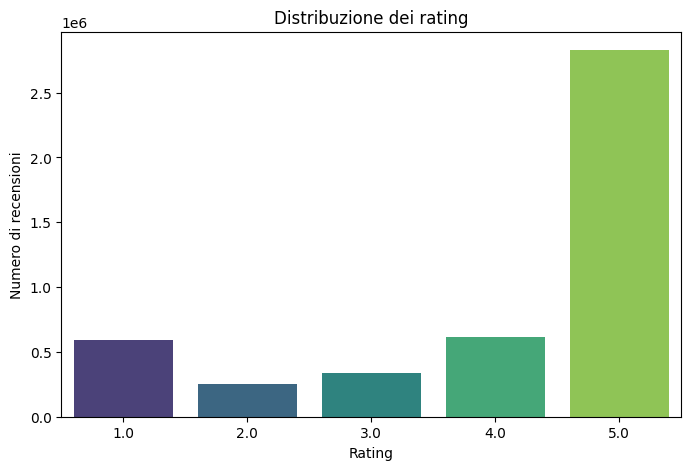

In [ ]:
#Distribuzione dei rating
import matplotlib.pyplot as plt
import seaborn as sns

rating_counts = Review_Video_Games['rating'].value_counts()
print(rating_counts) # Numero di valutazioni per ognuno dei 5 livelli di Rating

plt.figure(figsize=(8,5))
sns.countplot(data=Review_Video_Games, x='rating', palette='viridis')
plt.title('Distribuzione dei rating')
plt.xlabel('Rating')
plt.ylabel('Numero di recensioni')
plt.show()

user_id
AHJRJCJMK3XVV4BSPBRAHIYEODWA    664
AGMWACNMAG74AXBF7IJ22IOZSZPA    596
AGIBXD3LM6HNDWWRTIOJHB5EKNFA    469
AEWLQYBQDYWWUWK6UHHTNWO5AHYA    425
AHEDJIDSPVYCB3GPRZKGO7YTK6XQ    346
                               ... 
AHB7VCYPS6S6SXLTXFRMWTNWDVGA      1
AFEEN5MQUL2AXMIWADNK5SIJO6MA      1
AH6UTMLB6BHLXQVWJQ62VUM6K35Q      1
AF22KIFQVT2UFRECR6MOIHMYA5EQ      1
AGOH4TJVYVRHIGFDJYGR5GETCY6Q      1
Name: count, Length: 2766656, dtype: int64


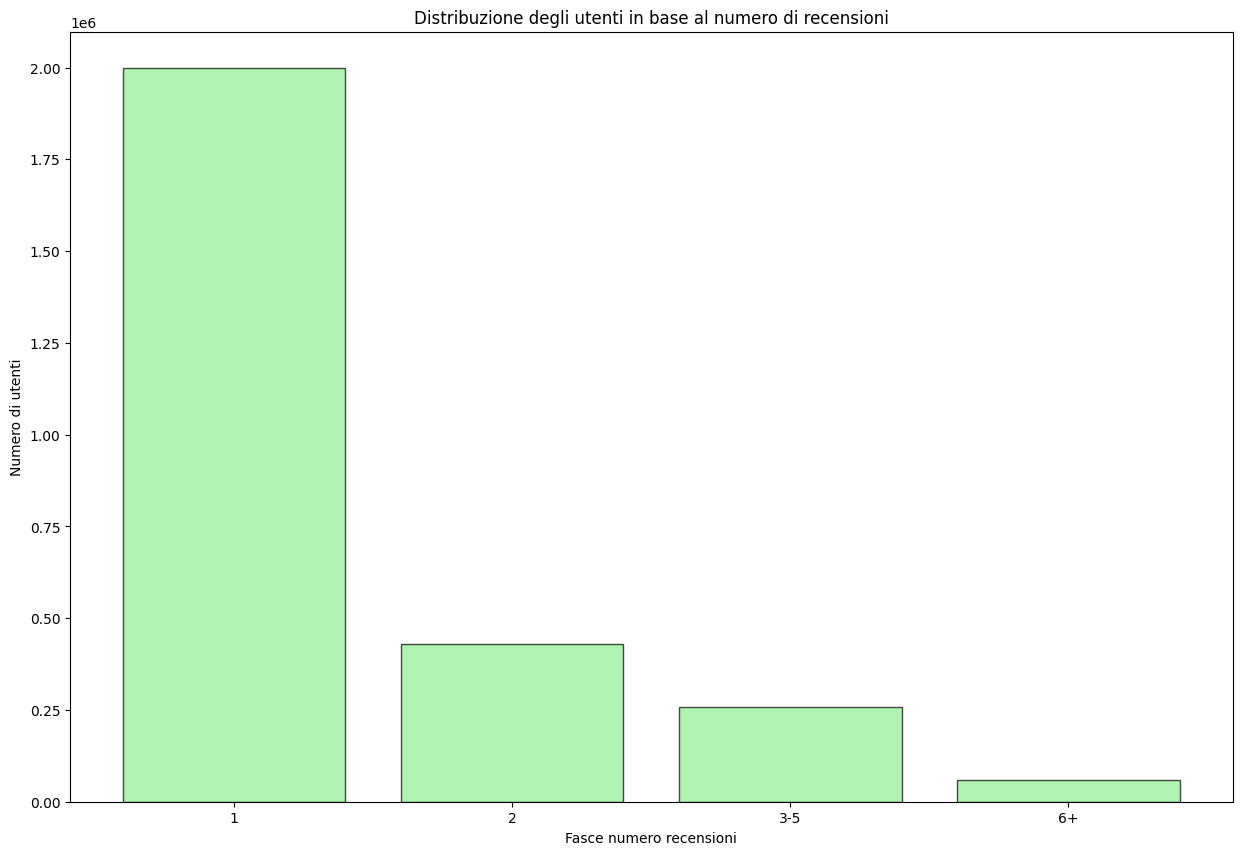

In [ ]:
# Distribuzione degli utenti in base al numero di recensioni
user_review_counts = Review_Video_Games['user_id'].value_counts()
print(user_review_counts) # Mi serve per capire come suddividere le recensioni in fasce, intuisco quanti utenti hanno un determinato numero di recensioni
u_review_counts = user_review_counts.values

plt.figure(figsize=(15, 10))
fasce = ['1', '2', '3-5','6+'] # Suddivido in fasce le recensioni
conteggi = []
conteggi.append(sum(1 for x in u_review_counts if x == 1))
conteggi.append(sum(1 for x in u_review_counts if x == 2))
conteggi.append(sum(1 for x in u_review_counts if 3 <= x <= 5))
conteggi.append(sum(1 for x in u_review_counts if x > 6))

plt.bar(fasce, conteggi, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuzione degli utenti in base al numero di recensioni')
plt.xlabel('Fasce numero recensioni')
plt.ylabel('Numero di utenti')
plt.show()

parent_asin
B01N3ASPNV    18105
B0BN942894    17310
B077GG9D5D    15594
B000N5Z2L4    13329
B0086VPUHI    12100
              ...  
B09LR7VX11        1
B088QHR73N        1
B006TQVNBE        1
B07YR87WC7        1
B0C7W87NFX        1
Name: count, Length: 137249, dtype: int64


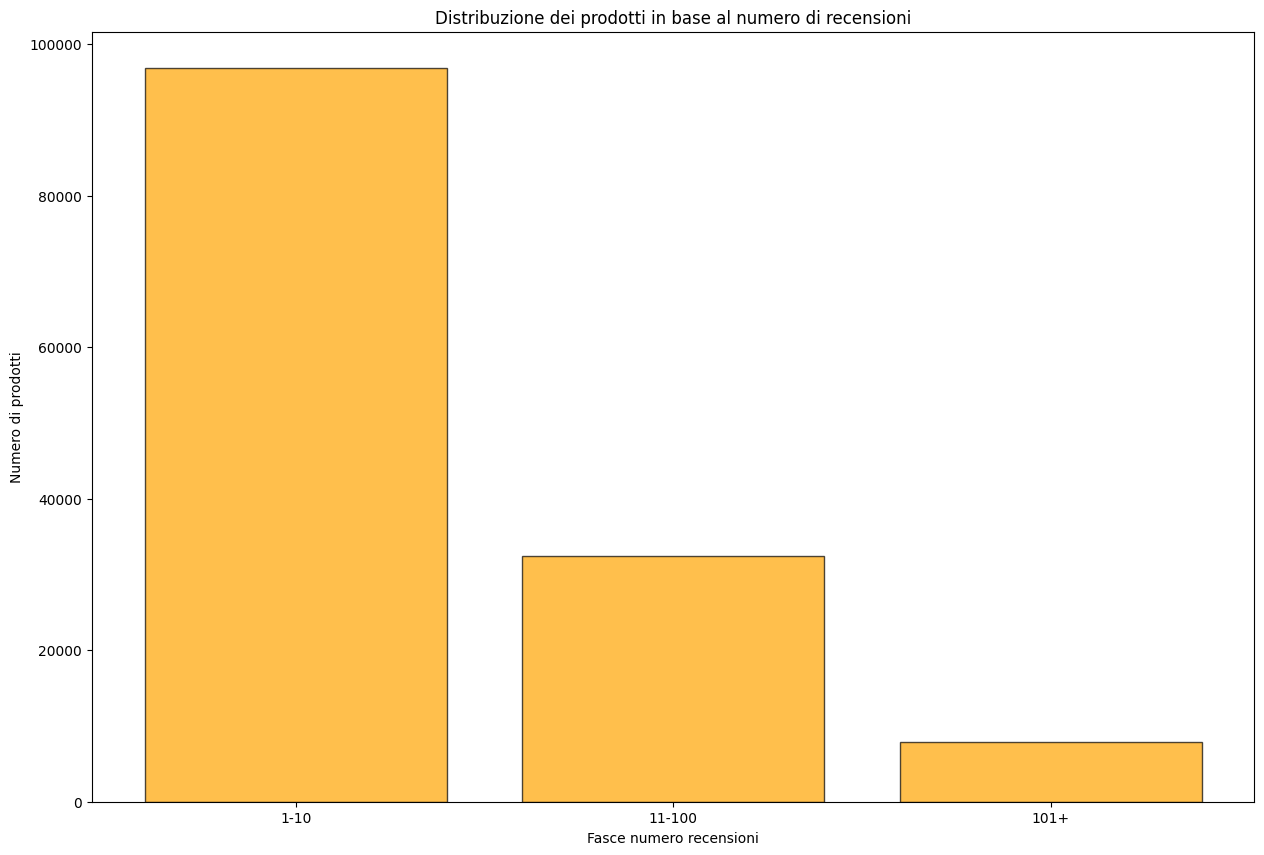

In [ ]:
import matplotlib.pyplot as plt
# Distribuzione dei prodotti in base al numero di recensioni
item_review_counts = Review_Video_Games['parent_asin'].value_counts()
print(item_review_counts)
i_review_counts = item_review_counts.values
plt.figure(figsize=(15, 10))
# Suddivido in fasce le recensioni, ho usato un criterio logico: la fiducia che l'utente può riporre nelle recensioni (1-10:dati scarsi,11-100:prodotto più consolidato, 101+:prodotto molto popolare)
fasce = ['1-10', '11-100', '101+']
conteggi = []

conteggi.append(sum(1 for x in i_review_counts if 1 <= x <= 10))
conteggi.append(sum(1 for x in i_review_counts if 11 <= x <= 100))
conteggi.append(sum(1 for x in i_review_counts if x > 100))

plt.bar(fasce, conteggi, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribuzione dei prodotti in base al numero di recensioni')
plt.xlabel('Fasce numero recensioni')
plt.ylabel('Numero di prodotti')
plt.show()

                rating  helpful_vote
rating        1.000000     -0.031549
helpful_vote -0.031549      1.000000


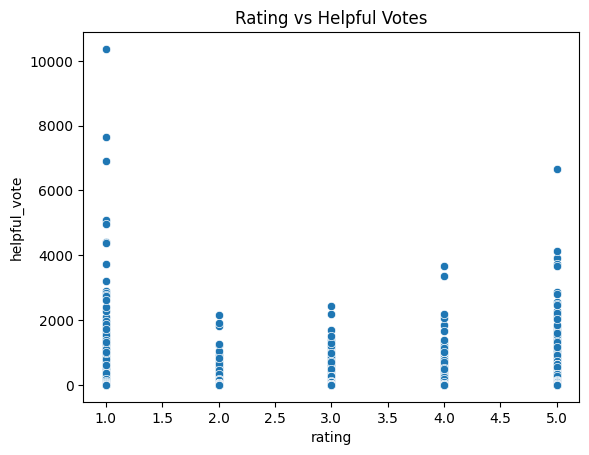

/tmp/ipython-input-5-2936432218.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlazione['verified_purchase_num'] = df_correlazione['verified_purchase'].astype(int)


                         rating  verified_purchase_num
rating                 1.000000               0.088801
verified_purchase_num  0.088801               1.000000


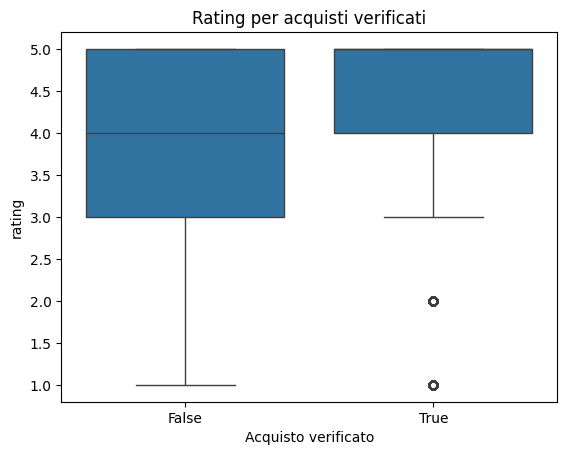

/tmp/ipython-input-5-2936432218.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlazione['date'] = pd.to_datetime(df_correlazione['timestamp'], unit='ms')
/tmp/ipython-input-5-2936432218.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlazione['year'] = df_correlazione['date'].dt.year


    year    rating
0   1998  4.500000
1   1999  4.111354
2   2000  4.098238
3   2001  4.023172
4   2002  4.031988
5   2003  3.972895
6   2004  3.908638
7   2005  3.838410
8   2006  3.781745
9   2007  3.979004
10  2008  3.824351
11  2009  3.955480
12  2010  3.876587
13  2011  3.921204
14  2012  4.016611
15  2013  4.094147
16  2014  4.182008
17  2015  4.197194
18  2016  4.145579
19  2017  4.090289
20  2018  4.051708
21  2019  4.161578
22  2020  4.001949
23  2021  3.925874
24  2022  3.876339
25  2023  3.935174


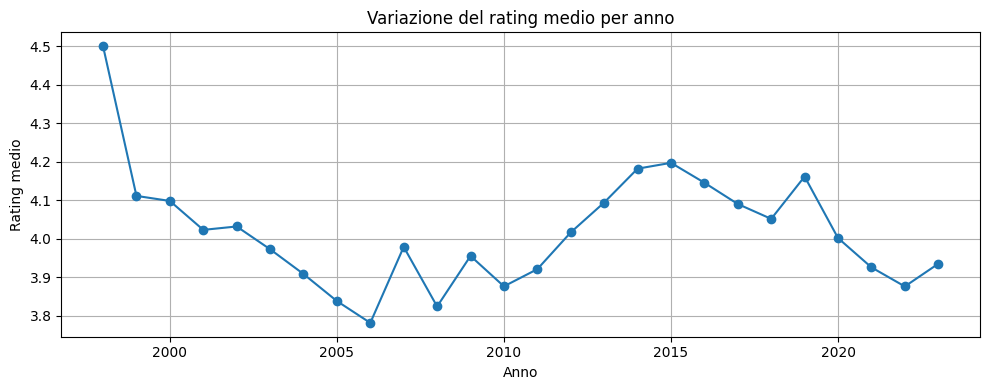

In [ ]:
# Analisi correlazione
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Correlazione tra rating e helpful_vote
# Scatterplot + coefficiente di correlazione
print(df_correlazione[['rating', 'helpful_vote']].corr())

sns.scatterplot(data=df_correlazione, x='rating', y='helpful_vote')
plt.title('Rating vs Helpful Votes')
plt.show()

# Correlazione tra rating e verified_purchase
# Convertiamo 'verified_purchase' in numerico (True/False → 1/0)
df_correlazione['verified_purchase_num'] = df_correlazione['verified_purchase'].astype(int)

print(df_correlazione[['rating', 'verified_purchase_num']].corr())

sns.boxplot(data=df_correlazione, x='verified_purchase', y='rating')
plt.xlabel('Acquisto verificato')
plt.title('Rating per acquisti verificati')
plt.show()

# Correlazione tra rating e timestamp
# Convertiamo timestamp in data leggibile
df_correlazione['date'] = pd.to_datetime(df_correlazione['timestamp'], unit='ms')
df_correlazione['year'] = df_correlazione['date'].dt.year

# Media dei rating per anno
media_anno = df_correlazione.groupby('year')['rating'].mean().reset_index()
print(media_anno)

plt.figure(figsize=(10, 4))
plt.plot(media_anno['year'], media_anno['rating'], marker='o')
plt.title('Variazione del rating medio per anno')
plt.xlabel('Anno')
plt.ylabel('Rating medio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 2
# In questo step devo identificare la configurazione ottimale dell’algoritmo K-NN per la predizione dei rating, tramite le diverse metriche di performance (MSE e RMSE). Testerò le diverse combinazioni: similarità, valore di K, user/item based.
# Devo filtrare le recensioni, sia per ridurre poi la dimensione della matrice sia per aumentare la qualità del sistema di raccomandazione
# Conto recensioni per user
user_counts = Review_Video_Games['user_id'].value_counts()
users_attivi = user_counts[user_counts > 25].index

# Conto recensioni per prodotto
item_counts = Review_Video_Games['parent_asin'].value_counts()
items_popolari = item_counts[item_counts > 25].index
# Ho deciso di filtrare prendendo solo utenti e prodotti con più di 25 recensioni
# Applico il filtro
Review_Video_Games_filtrato = Review_Video_Games[Review_Video_Games['user_id'].isin(users_attivi) & Review_Video_Games['parent_asin'].isin(items_popolari)]

# Guardo la dimensione prima del filtro
print(f"Numero righe prima del filtraggio: {Review_Video_Games.shape[0]}")
print(f"Utenti unici: {Review_Video_Games['user_id'].nunique()}")
print(f"Prodotti unici: {Review_Video_Games['parent_asin'].nunique()}")
# Guardo la dimensione dopo il filtro
print(f"Numero righe dopo il filtraggio: {Review_Video_Games_filtrato.shape[0]}")
print(f"Utenti unici: {Review_Video_Games_filtrato['user_id'].nunique()}")
print(f"Prodotti unici: {Review_Video_Games_filtrato['parent_asin'].nunique()}")

Numero righe prima del filtraggio: 4624615
Utenti unici: 2766656
Prodotti unici: 137249
Numero righe dopo il filtraggio: 112383
Utenti unici: 3195
Prodotti unici: 15061


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Review_Video_Games_filtrato[['user_id', 'parent_asin', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)
from surprise import KNNBasic

def v_knn(similarity_type, user_based, k):
    sim_options = {'name': similarity_type,'user_based': user_based}

    algo = KNNBasic(k=k, sim_options=sim_options)
    algo.fit(trainset)
    predictions = algo.test(testset)

    mse = accuracy.mse(predictions, verbose=False)
    rmse = accuracy.rmse(predictions, verbose=False)

    return {
        'Similarity': similarity_type,
        'User-Based': user_based,
        'K': k,
        'MSE': mse,
        'RMSE': rmse
    }
risultati = []

for sim in ['cosine', 'pearson']:
    for user_based in [True, False]:  # True: user-user (User-based), False: item-item (Item-based)
        for k in [10, 20, 40]:        # Ho cercato di prendere valori di k che non fossero nè troppo grandi nè troppo piccoli
            res = v_knn(sim, user_based, k)
            print(f"Valutata combinazione: {res}")
            risultati.append(res)

# Ho usato come similarità sia la similarità coseno che Pearson

# Converto in DataFrame per visualizzare il risultato finale
import pandas as pd
risultati_df = pd.DataFrame(risultati)
risultati_df = risultati_df.sort_values('RMSE') # Metto in ordine crescente, basandomi sui risultati del Root Mean Squared Error
risultati_df
# La configurazione ottimale che ottengo è: K = 40, Similarity = similarità coseno, Item-based

Numero righe dopo il filtraggio: 112383
Utenti unici: 3195
Prodotti unici: 15061
Computing the cosine similarity matrix...
Done computing similarity matrix.
Valutata combinazione: {'Similarity': 'cosine', 'User-Based': True, 'K': 10, 'MSE': 1.3954285990536133, 'RMSE': 1.1812826076149658}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Valutata combinazione: {'Similarity': 'cosine', 'User-Based': True, 'K': 20, 'MSE': 1.3809754771356761, 'RMSE': 1.175149129742977}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Valutata combinazione: {'Similarity': 'cosine', 'User-Based': True, 'K': 40, 'MSE': 1.3792060579017862, 'RMSE': 1.1743960396313444}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Valutata combinazione: {'Similarity': 'cosine', 'User-Based': False, 'K': 10, 'MSE': 1.1073310194596115, 'RMSE': 1.0522979708521782}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Valutata co

,Similarity,User-Based,K,MSE,RMSE
5,cosine,False,40,1.088697,1.043406
4,cosine,False,20,1.090581,1.044309
3,cosine,False,10,1.107331,1.052298
11,pearson,False,40,1.175995,1.084433
10,pearson,False,20,1.176120,1.084491
9,pearson,False,10,1.177174,1.084977
8,pearson,True,40,1.354978,1.164035
7,pearson,True,20,1.355152,1.164110
6,pearson,True,10,1.355311,1.164178
2,cosine,True,40,1.379206,1.174396


In [ ]:
# STEP 3
# In questo step devo fare filling della matrice di rating con la configurazione ottimale appena trovata
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Review_Video_Games_filtrato[['user_id', 'parent_asin', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

from surprise import KNNBasic
# Uso la configurazione ottimale
configurazione_migliore = {'name': 'cosine','user_based': False}
k_migliore = 40

algo = KNNBasic(k=K_migliore, sim_options=configurazione_migliore)
algo.fit(trainset)

from collections import defaultdict

# Prendo tutti gli user / item mancanti nel training set
trainset_users = set([trainset.to_raw_uid(u) for u in trainset.all_users()])
trainset_items = set([trainset.to_raw_iid(i) for i in trainset.all_items()])

# Ora genero tutte le possibili coppie user-item
coppie_possibili = []
for uid in trainset_users:
    for iid in trainset_items:
        if not trainset.knows_user(trainset.to_inner_uid(uid)) or not trainset.knows_item(trainset.to_inner_iid(iid)):
            continue
        if not trainset.ur[trainset.to_inner_uid(uid)] or iid in [trainset.to_raw_iid(i[0]) for i in trainset.ur[trainset.to_inner_uid(uid)]]:
            continue
        coppie_possibili.append((uid, iid))
print(f"Numero di rating da predire: {len(coppie_possibili)}")

# Dopo aver calcolato quanti sono i rating da predire procedo a realizzare effettivamente il filling
from surprise import PredictionImpossible

ratings_fillati = []

for uid in trainset_users:
    for iid in trainset_items:
        try:
            pred = algo.predict(uid, iid)
            ratings_fillati.append((uid, iid, pred.est))
        except PredictionImpossible:
            continue

# Ora posso printare, per esempio, dieci predizioni (random) fatte per un utente
for tupla_ratings in ratings_fillati[:10]:
    print(tupla_ratings)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Numero di rating da predire: 45188592
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B00HGAWFJG', 4.2695370720530335)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B07BWH4GX3', 5)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B01F9B019Y', 4.2695370720530335)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B000GPW2QO', 5)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B003Q9RG9K', 5)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B07QLZZSM8', 4.2695370720530335)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B06XHMPPLH', 5)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B0BGBHSYNW', 4.2695370720530335)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B00HWMP0OU', 5)
('AE35KI75TRXMYJFK6AQBJBZEFLVQ', 'B073P8X6Z1', 5)


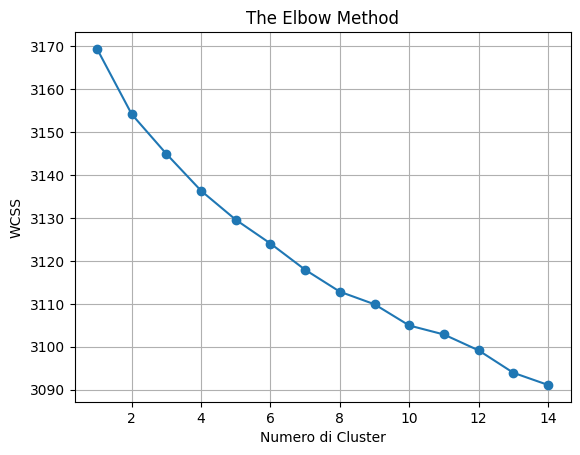

In [ ]:
# STEP 4
# In questo step devo segmentare gli utenti in base alle loro preferenze applicando l'algoritmo di clustering K-Means con similarità coseno
# Costruisco una matrice user-item (con i rating reali, non predetti)
pivot_df = Review_Video_Games_filtrato.pivot_table(index='user_id',columns='parent_asin',values='rating').fillna(0)
# Faccio una scelta pratica: nei rating mancanti metto come valore 0

from sklearn.preprocessing import normalize
# Normalizzo
pivot_normalizzata = normalize(pivot_df, norm='l2', axis=1)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(pivot_normalizzata)
    wcss.append(km.inertia_)

import matplotlib.pyplot as plt
# Elbow method per trovare il k ottimale
plt.plot(range(1, 15), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(pivot_normalizzata)
    score = silhouette_score(pivot_normalizzata, labels)
    print(f"K={k} → silhouette score: {score:.4f}")

# Guardando il grafico dell'elbow method e il silhouette score, il valore ottimale che scelgo è k = 8

K=2 → silhouette score: 0.0029
K=3 → silhouette score: 0.0031
K=4 → silhouette score: 0.0035
K=5 → silhouette score: 0.0028
K=6 → silhouette score: 0.0027
K=7 → silhouette score: 0.0027
K=8 → silhouette score: 0.0030
K=9 → silhouette score: 0.0026
K=10 → silhouette score: 0.0023
K=11 → silhouette score: 0.0026
K=12 → silhouette score: 0.0027
K=13 → silhouette score: 0.0026
K=14 → silhouette score: 0.0026


In [ ]:
# Applico il clustering con K=8
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 300, n_init = 10, random_state=1)
cluster_labels = kmeans.fit_predict(pivot_normalizzata)

# Aggiungo i cluster alla matrice originale
pivot_df['cluster'] = cluster_labels
pivot_df.reset_index(inplace=True)
pivot_df[['user_id', 'cluster']].head()

parent_asin,user_id,cluster
0,AE25Y2LOSEKTPUJFDPWYJNYCQ7EQ,4
1,AE25ZDXYBK3LHKCZ7XUODANPME4A,3
2,AE27WQWQY6ZIJPFSWXMBDVHKXVVA,4
3,AE2A5TMJ6YE6ZNWUAFTC6P5XAHXA,4
4,AE2AZ2MNROPF33U6SS53VI22OXJA,0


In [ ]:
# STEP 5
# Ora procedo con la creazione per ogni utente della lista degli n items (top k items) da consigliare
!pip install surprise

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Review_Video_Games_filtrato[['user_id', 'parent_asin', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

# Scelgo un N
TOP_N = 5
# Costruisco una funzione per ottenere i top-N per ogni utente
from collections import defaultdict
from surprise import KNNBasic

# Prima di tutto rifaccio il training del modello migliore
sim_options = {'name': 'cosine','user_based': False}
algo = KNNBasic(k=40, sim_options=sim_options)
algo.fit(trainset)

# Calcolo numero recensioni per ogni item nel dataset filtrato (questo mi servirà per avere un criterio di ordine nell'esposizione dei top N items da raccomandare)
item_review_counts = Review_Video_Games_filtrato['parent_asin'].value_counts().to_dict()

# Calcolo i top-N predetti (mantengo il 5 come il TOP N che ho scelto, ma chiaramente potremmo calcolarne di più al bisogno)
def f_top_n(predictions, n=5, review_counts=None):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        num_reviews = review_counts.get(iid, 0) if review_counts else 0
        top_n[uid].append((iid, est, num_reviews))

# Qui ordino per rating, poi in secondo piano ordinerò anche per il numero di recensioni (a parità di valutazione, preferisco mettere prodotti che hanno il maggior numero di valutazioni)
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: (x[1], x[2]), reverse=True)[:n]
    return top_n

# Costruisco lista completa user-item da predire
trainset_users = set([trainset.to_raw_uid(u) for u in trainset.all_users()])
trainset_items = set([trainset.to_raw_iid(i) for i in trainset.all_items()])

# Per una questione di RAM disponibile e per facilità di confronto prendo solo un campione casuale di 100 utenti
import random
random.seed(1)
campione_users = random.sample(list(trainset_users), 100)

import json
with open("campione_users_100.json", "w") as f:
    json.dump(campione_users, f)

# Creo le coppie (user, item) solo per quelli non ancora valutati
testset = []
for uid in campione_users:
    items_valutati = set([trainset.to_raw_iid(iid) for (iid, _) in trainset.ur[trainset.to_inner_uid(uid)]])
    items_non_valutati = trainset_items - items_valutati
    testset.extend((uid, iid, 0) for iid in items_non_valutati)

# Faccio le predictions
predictions = algo.test(testset)

# Ottengo i top-N (tenendo conto che, a parità di valutazione, ordino per il numero di recensioni)
knn_raccomandazioni = f_top_n(predictions, n=TOP_N, review_counts=item_review_counts)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
import pandas as pd

# Costruisco una lista di righe per poi mettere tutto in un dataframe in modo da facilitare la visione dell'output finale
def top_n_in_dataframe(top_n_dict):
    rows = []
    for uid, racc in top_n_dict.items():
        row = {'user_id': uid}
        for i, (iid, rating, reviews) in enumerate(racc, 1):
            row[f'item_{i}'] = iid
            row[f'rating_{i}'] = round(rating, 2)
            row[f'reviews_{i}'] = reviews
        rows.append(row)
    return pd.DataFrame(rows)

# Ad esempio ora posso mostrare i primi 10 utenti e i loro 5 prodotti raccomandati, in ordine di valutazione in primis e in caso di parità, guardando il numero di recensioni
subset_top_n = dict(list(knn_raccomandazioni.items())[:10])
top_n_df = top_n_in_dataframe(subset_top_n)
top_n_df.head(10)

,user_id,item_1,rating_1,reviews_1,item_2,rating_2,reviews_2,item_3,rating_3,reviews_3,item_4,rating_4,reviews_4,item_5,rating_5,reviews_5
0,AFVYDI4KWVNBEKHFQDPLAMGCD67A,B07YBXFDYN,5.00,296,B07YBWT3PK,5.00,211,B01N3ASPNV,5.00,200,B087NNPYP3,5.00,175,B00C1TTF86,5.00,170
1,AG6V7FRKPA6ILOYTABMYMRLWFRAQ,B00K0NV5J2,5.00,139,B004LLHFAW,5.00,137,B001E8WQKY,5.00,115,B072V478NR,5.00,107,B002JTX7JQ,5.00,105
2,AGGRZR7RQQXUDJIVEWFEBD2CNTVQ,B00KIWEMIG,5.00,168,B0088TN73M,5.00,139,B004LLHFAW,5.00,137,B07YBXFF99,5.00,133,B009VUHVPM,5.00,132
3,AEFJNOB2BIMMXHVX6GH3XUA6DONA,B09MGJXGBF,5.00,42,B07D3JSZ8F,5.00,42,B081243BT6,5.00,37,B08P1NS2X1,5.00,35,B07V5CFMY4,5.00,34
4,AEYYKAJ6GVAFJZEN6BMQPQAS6BHA,B009VUHVPM,5.00,132,B07624RBWB,5.00,118,B0062UOBW0,5.00,93,B07PZ8NZSZ,5.00,85,B07YBX5FVF,5.00,75
5,AEGW3QTWMAFAB634BXMKKRZ5XPYQ,B009VUHVPM,4.27,132,B01GY35GIM,4.27,110,B087SHFL9B,4.27,109,B087NN2K41,4.27,100,B07WS18ZS3,4.27,82
6,AFRULJ47WEAMKTW4S7YO6WAVFDFA,B07CPZ3PJG,5.00,28,B0007TFLLC,5.00,27,B07GRP33YM,5.00,27,B0C6L9RG7G,5.00,25,B09TQBJCJ6,5.00,23
7,AHPJHWUFX7DFIVS5B3XNEK7JLSAQ,B001EYUPP6,5.00,37,B001D7JEJM,5.00,36,B003N18O5Q,5.00,35,B00KTORA0K,5.00,35,B001ELJFGE,5.00,34
8,AE6C3RB4MNC36ONGCU3TMSLMER6Q,B07YBXFDYN,5.00,296,B0086VPUHI,5.00,265,B07YBWT3PK,5.00,211,B00BGA9WK2,5.00,203,B01N3ASPNV,5.00,200
9,AG32ISGSRQE4ZRTMDTPEHZ4GDVEA,B004RMK5QG,5.00,147,B008CZN458,5.00,141,B001EYUPHO,5.00,139,B00K0NV5J2,5.00,139,B0088TN73M,5.00,139


In [ ]:
# STEP 6
# In questo step devo utilizzare la Matrix Factorization per predire i rating, per poi confrontare le performance con KNN tramite RMSE e MSE.

from surprise import SVD
from surprise import accuracy

# Prima di tutto, alleno il modello SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Review_Video_Games_filtrato[['user_id', 'parent_asin', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

svd = SVD()
svd.fit(trainset)

# Predizioni sul test set
predictions_svd = svd.test(testset)

# Calcolo RMSE e MSE per SVD
rmse_svd = accuracy.rmse(predictions_svd)
mse_svd = accuracy.mse(predictions_svd)

# Ora posso confrontare con KNN
from surprise import KNNBasic

# Riprendo la stessa configurazione ottimale dello step 2
sim_options = {'name': 'cosine', 'user_based': False}
knn = KNNBasic(k=40, sim_options=sim_options)
knn.fit(trainset)

predictions_knn = knn.test(testset)

rmse_knn = accuracy.rmse(predictions_knn)
mse_knn = accuracy.mse(predictions_knn)

# Printo il confronto finale
print("\nCONFRONTO FINALE")
print(f"KNN → RMSE: {rmse_knn:.4f} | MSE: {mse_knn:.4f}")
print(f"SVD → RMSE: {rmse_svd:.4f} | MSE: {mse_svd:.4f}")

RMSE: 0.9448
MSE: 0.8926
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0434
MSE: 1.0887

CONFRONTO FINALE
KNN → RMSE: 1.0434 | MSE: 1.0887
SVD → RMSE: 0.9448 | MSE: 0.8926


In [ ]:
!pip install -U datasets==2.16.0
from datasets import load_dataset
metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", 'raw_meta_Video_Games')
metadata_df = metadata['full'].to_pandas()
metadata_df = metadata_df[['parent_asin', 'title', 'description']]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/datasets/load.py:1429: FutureWarning: The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major re

In [ ]:
# PROGETTO INTERMEDIO
# STEP 1
# Innanzitutto applico lo stesso filtro che avevo messo nel progetto base, per gli stessi motivi e in generale mantenere coerenza, essendo che poi dovremo confrontarli
item_filtrati = Review_Video_Games_filtrato['parent_asin'].unique()
# Considero solo gli item rimasti dopo l'applicazione del filtro
metadata_df = metadata_df[metadata_df['parent_asin'].isin(item_filtrati)]

# In questo step devo processare gli attributi testuali dei prodotti (prendo title e description), in modo tale che siano pronti per gli embedding
# Creo una nuova colonna con title + description
metadata_df['text'] = metadata_df['title'].fillna('').astype(str) + ' ' + metadata_df['description'].fillna('').astype(str)
metadata_df['text_clean'] = metadata_df['text'].str.strip()

# Faccio pulizia e preprocessing del testo
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).strip().lower() # Converto tutto in minuscolo
    text = re.sub(r'[^a-z\s]', '', text) # Rimuovo tutto tranne lettere e spazi
    text = re.sub(r'\s+', ' ', text).strip() # Metto un singolo spazio al posto di più spazi consecutivi
    tokens = text.split() # Divido il testo in parole (token)
    tokens = [word for word in tokens if word not in stop_words]  # Rimuovo le stopwords
    tokens = [stemmer.stem(word) for word in tokens] # Faccio la normalizzazione del testo riducendo le parole alla loro forma radice.
    text = ' '.join(tokens)
    text = re.sub(r'\s+', ' ', text).strip() # Metto un singolo spazio al posto di più spazi consecutivi dopo aver rimosso le stop words
    return text

# Applico la funzione per aggiornare la colonna creata con il testo "pulito"
metadata_df['text_clean'] = metadata_df['text'].apply(clean_text)

# Ora posso printare l'head del testo "pulito"
print(metadata_df['text_clean'].head)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<bound method NDFrame.head of 2         nba k earli tip edit playstat follow recordbre...
7         extremer soft touch top shell front hous facep...
11        turbo super stunt squad nintendo ds product de...
15        warhamm dawn war game year pc manufactur game ...
18                                                   eeekit
                                ...                        
118595    dc superman fun pack lego dimens mysteri power...
119799    die light stay human playstat twenti year ago ...
123440    kiwi design ultrasoft clipon headphon compat q...
128144                chronicl riddick escap butcher bay pc
133855        thrustmast ferrari nrl wheel stand lite bundl
Name: text_clean, Length: 15061, dtype: object>


In [ ]:
# STEP 2
# In questo step creo gli embedding, prima con tecnica basata sulla frequenza (TFIDF), poi con tecnica neurale (transformers)
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.95, token_pattern=r'(?u)\b\w\w+\b')
# Considero le prime 5000 parole più frequenti e rilevanti, prendendo solo parole che appaiono almeno in 5 item e escludendo le parole presenti in più del 95% degli item.
# Applico poi il TFIDF sulla colonna pulita
tfidf_matrix = tfidf.fit_transform(metadata_df['text_clean'])

# Verifico la shape
print(f"TFIDF shape: {tfidf_matrix.shape}")

# Ora posso printare l'embedding dei prodotti (prendo un sample di 5 items come esempio)
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=metadata_df['parent_asin'], columns=tfidf.get_feature_names_out())
tfidf_df.head(5)

TFIDF shape: (15061, 5000)


,aa,aaa,ab,abandon,abduct,abe,abil,abl,aboard,absolut,...,zelda,zenimax,zero,zip,zipper,zombi,zone,zoo,zoom,zumba
parent_asin,,,,,,,,,,,,,,,,,,,,,
B00Z9TLVK0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
B07H93H878,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
B00BJH85SW,0.0,0.0,0.0,0.0,0.0,0.0,0.052455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
B001EYUX4Y,0.0,0.0,0.0,0.0,0.0,0.0,0.045893,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124815,0.0
B01N9HGQTM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# TRANSFORMERS
!pip install transformers --quiet
!pip install sentence-transformers --quiet
from sentence_transformers import SentenceTransformer

# Carico un modello pre-addestrato
model = SentenceTransformer('all-MiniLM-L6-v2')

# Uso il campo già pulito
texts = metadata_df['text_clean'].tolist()

# Embedding di tutti i prodotti
embeddings = model.encode(texts, batch_size=16)

# Verifico la shape
print(f"Transformers shape: {embeddings.shape}")

# Converto tutto in una dataframe
import pandas as pd
embedding_df = pd.DataFrame(embeddings, index=metadata_df['parent_asin'])
embedding_df.head()

Transformers shape: (15061, 384)


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
parent_asin,,,,,,,,,,,,,,,,,,,,,
B00Z9TLVK0,-0.049201,0.016514,-0.016203,-0.117681,-0.071885,0.118582,0.147196,0.012877,0.053295,0.122205,...,0.072063,0.038335,0.023418,0.076885,0.003659,-0.067073,0.094093,0.005380,-0.005497,0.048480
B07H93H878,-0.007167,-0.041943,0.034650,0.031046,0.044565,-0.019741,0.066344,0.021511,-0.054020,0.063921,...,0.019827,0.042099,0.012907,-0.046862,0.049012,0.041983,0.087601,0.076375,-0.073701,0.085508
B00BJH85SW,-0.103978,-0.047863,-0.011609,-0.042338,-0.052997,0.059457,0.002432,0.038821,-0.096055,-0.021072,...,0.027572,0.097387,-0.018617,-0.028804,0.002629,0.001190,0.010532,-0.031860,-0.015081,0.002724
B001EYUX4Y,0.009404,-0.022230,-0.023390,-0.045710,-0.080369,0.065583,0.012872,-0.008100,-0.064673,0.032947,...,-0.020327,0.021483,-0.002586,0.101969,0.039033,0.008975,0.146603,-0.108721,-0.032989,0.001784
B01N9HGQTM,-0.023801,0.040475,0.062559,0.006697,0.043779,-0.113267,0.165839,0.091189,0.037370,-0.062194,...,0.067761,0.045697,-0.004716,0.018272,-0.077087,0.023157,0.148370,0.003346,0.025418,0.012707


In [ ]:
# STEP 3
# In questo step devo effettuare predizioni per ogni utente usando KNN come algoritmo, usando gli embedding ottenuti con le due tecniche dello step 2
matrice_ratings = Review_Video_Games_filtrato.pivot_table(index='user_id', columns='parent_asin', values='rating')

from sklearn.metrics.pairwise import cosine_similarity
# TFIDF
# Calcolo la similarità item-item
tfidf_sim_matrix = cosine_similarity(tfidf_matrix)
tfidf_sim_df = pd.DataFrame(tfidf_sim_matrix, index=metadata_df['parent_asin'], columns=metadata_df['parent_asin'])

# Transformers
# Calcolo la similarità item-item
transf_sim_matrix = cosine_similarity(embedding_df.values)
transf_sim_df = pd.DataFrame(transf_sim_matrix, index=embedding_df.index, columns=embedding_df.index)

In [ ]:
# Creo una funzione per predire i top_N item per un utente
import numpy as np

def top_n_raccomandazioni(user_id, matrice_ratings, sim_df,item_review_counts, k_neighbors=5, top_n=5):
    items_valutati = matrice_ratings.loc[user_id].dropna()
    items_non_valutati = matrice_ratings.loc[user_id][matrice_ratings.loc[user_id].isna()].index

    predictions = []

    for item in items_non_valutati:
        similarità = sim_df.loc[item, items_valutati.index]
        top_k = similarità.sort_values(ascending=False).head(k_neighbors)
        top_k_ratings = items_valutati[top_k.index]

        if top_k_ratings.empty or top_k.sum() == 0:
            continue

        rating_predetto = np.dot(top_k, top_k_ratings) / top_k.sum()
        rating_predetto = min(5.0, max(1.0, rating_predetto))
        num_reviews = item_review_counts.get(item, 0)
        predictions.append((item, rating_predetto, num_reviews))

# Ordino prima per rating, poi per numero di recensioni
    predictions_ordinate = sorted(predictions, key=lambda x: (x[1], x[2]), reverse=True)
    return [(item, rating) for item, rating, _ in predictions_ordinate[:top_n]]

# Calcolo il numero recensioni per ogni item (questo mi servirà per avere un criterio di ordine nell'esposizione dei top N items da raccomandare, coerente con quanto fatto nel progetto base)
item_review_counts = Review_Video_Games_filtrato['parent_asin'].value_counts().to_dict()

# Per una questione di RAM disponibile e per facilità di confronto prendo solo un campione casuale di 100 utenti (rimanendo coerente con quanto fatto nel progetto base)
import json
with open("campione_users_100.json") as f:
    campione_users_100 = json.load(f)

tfidf_raccomandazioni = {}
transf_raccomandazioni = {}

# TFIDF
for user_id in campione_users_100:
    tfidf_raccomandazioni[user_id] = top_n_raccomandazioni(user_id=user_id, matrice_ratings=matrice_ratings, sim_df=tfidf_sim_df, item_review_counts=item_review_counts, k_neighbors=5, top_n=5)

# Transformers
for user_id in campione_users_100:
    transf_raccomandazioni[user_id] = top_n_raccomandazioni(user_id=user_id, matrice_ratings=matrice_ratings, sim_df=transf_sim_df, item_review_counts=item_review_counts, k_neighbors=5, top_n=5)

In [ ]:
# Metto tutto in dataframe
tfidf_df = pd.DataFrame([{"user_id": user, "item_id": item, "titolo": metadata_df.loc[metadata_df['parent_asin'] == item, 'title'].values[0] if not metadata_df.loc[metadata_df['parent_asin'] == item, 'title'].empty else 'Titolo non trovato', "rating predetto": rating, "recensioni": item_review_counts.get(item, 0)}
for user, racc in tfidf_raccomandazioni.items()
for item, rating in racc])

transf_df = pd.DataFrame([{"user_id": user, "item_id": item, "titolo": metadata_df.loc[metadata_df['parent_asin'] == item, 'title'].values[0] if not metadata_df.loc[metadata_df['parent_asin'] == item, 'title'].empty else 'Titolo non trovato', "rating predetto": rating, "recensioni": item_review_counts.get(item, 0)}
for user, racc in transf_raccomandazioni.items()
for item, rating in racc])

print("=== TFIDF ===")
print(tfidf_df.head())

print("\n=== Transformers ===")
print(transf_df.head())

=== TFIDF ===
                        user_id     item_id  \
0  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B07624RBWB   
1  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B077GG9D5D   
2  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B001EYUSJ4   
3  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B00BZS9JV2   
4  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B00BGA9X9W   

                                              titolo  rating predetto  \
0                     Nintendo Switch Pro Controller              5.0   
1  DualShock 4 Wireless Controller for PlayStatio...              5.0   
2                 Final Fantasy XIII - Playstation 3              5.0   
3                          Rayman Legends [Download]              5.0   
4  DualShock 4 Wireless Controller for PlayStatio...              5.0   

   recensioni  
0         118  
1         118  
2         117  
3         111  
4          98  

=== Transformers ===
                        user_id     item_id  \
0  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B004RMK5QG   
1  AESW4NTE4XRADKDMSY5YEOOR7IOQ  B00BZS9JV2   
2  AE

In [ ]:
# Analisi più approfondite nei 2 step finali

# Overlap per lo step 4 e 5
overlap_tfidf_transf = []
overlap_cb_cf = []

for user in campione_users_100:
    tfidf_items = [item for item, _ in tfidf_raccomandazioni.get(user, [])]
    transf_items = [item for item, _ in transf_raccomandazioni.get(user, [])]
    cf_items = [item for item, _, _ in knn_raccomandazioni.get(user, [])]

    # TFIDF vs Transf
    overlap_tb = len(set(tfidf_items) & set(transf_items)) / 5
    overlap_tfidf_transf.append(overlap_tb)

    # Content-Based vs CF
    overlap_cbcf = len(set(transf_items) & set(cf_items)) / 5 if cf_items else 0
    overlap_cb_cf.append(overlap_cbcf)

print(f"Media overlap TFIDF/Transf: {np.mean(overlap_tfidf_transf):.2f}")
print(f"Media overlap CB/CF: {np.mean(overlap_cb_cf):.2f}")

Media overlap TFIDF/Transf: 0.15
Media overlap CB/CF: 0.02


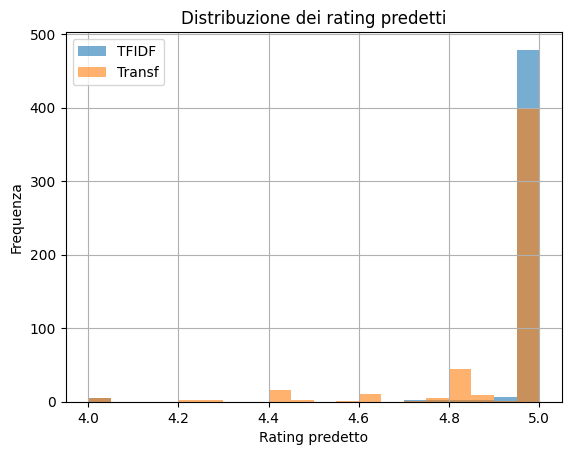

In [ ]:
# Distribuzione dei rating predetti per lo step 4
import matplotlib.pyplot as plt

tfidf_ratings = [rating for racc in tfidf_raccomandazioni.values() for _, rating in racc]
transf_ratings = [rating for racc in transf_raccomandazioni.values() for _, rating in racc]

plt.hist(tfidf_ratings, bins=20, alpha=0.6, label='TFIDF')
plt.hist(transf_ratings, bins=20, alpha=0.6, label='Transf')
plt.xlabel('Rating predetto')
plt.ylabel('Frequenza')
plt.legend()
plt.title('Distribuzione dei rating predetti')
plt.grid(True)
plt.show()

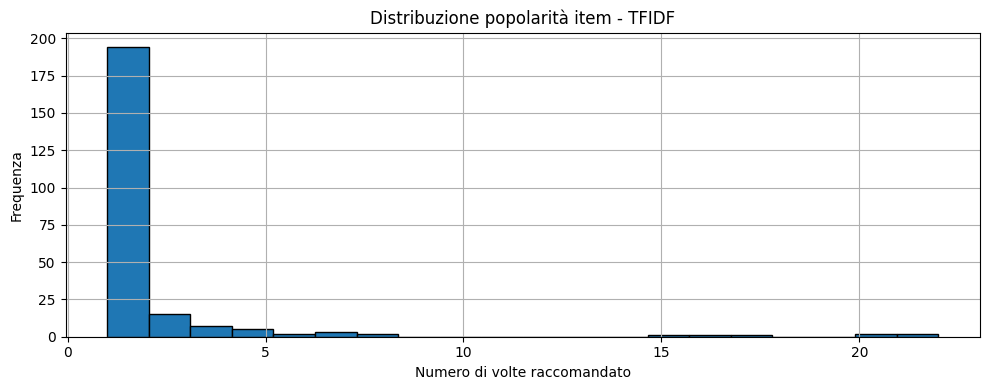

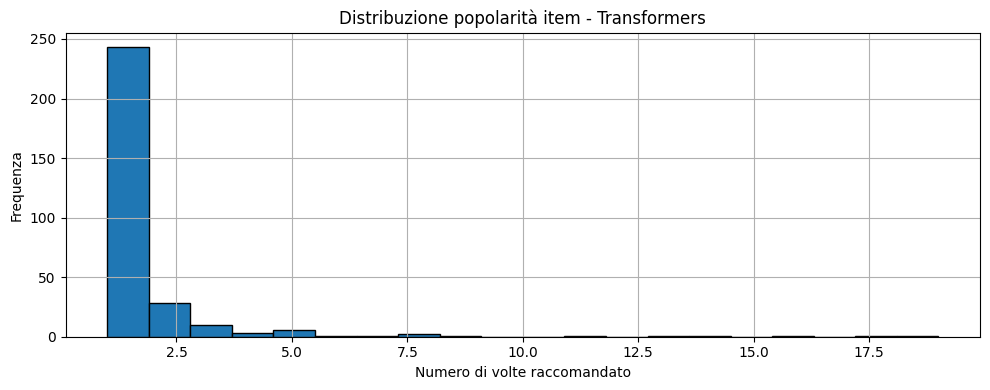

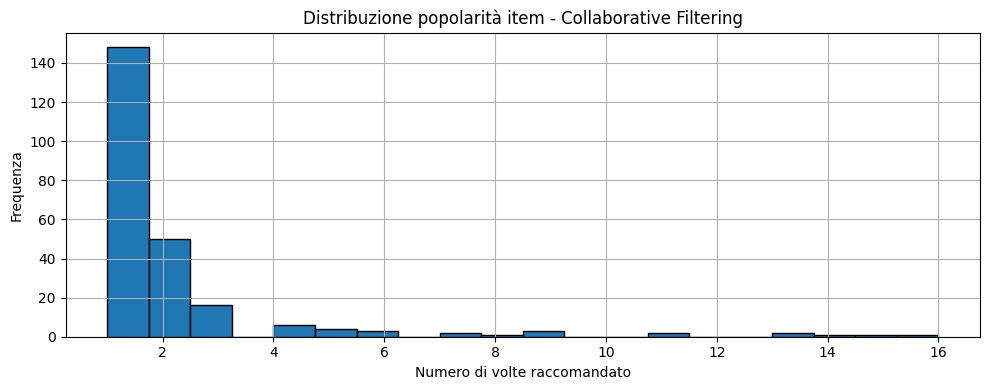

In [ ]:
# Distribuzione della popolarità degli item raccomandati per lo step 5
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribuzione_popolarità(raccomandazioni_diz, nome_modello):
    t_items = []
    for racc in raccomandazioni_diz.values():
        for rac in racc:
            if len(rac) == 3:
                t_items.append(rac[0])
            elif len(rac) == 2:
                t_items.append(rac[0])

    item_counts = pd.Series(t_items).value_counts()

    plt.figure(figsize=(10, 4))
    item_counts.plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Distribuzione popolarità item - {nome_modello}')
    plt.xlabel('Numero di volte raccomandato')
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_distribuzione_popolarità(tfidf_raccomandazioni, 'TFIDF')
plot_distribuzione_popolarità(transf_raccomandazioni, 'Transformers')
plot_distribuzione_popolarità(knn_raccomandazioni, 'Collaborative Filtering')

In [ ]:
!pip install datasets==2.16.0
from datasets import load_dataset
dataset = load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_review_Video_Games')
Review_Video_Games_A = dataset['full'].to_pandas()
Review_Video_Games_A = Review_Video_Games_A.drop(columns=['user_id', 'images', 'asin', 'timestamp', 'verified_purchase', 'helpful_vote']) # Seleziono solo le informazioni essenziali, togliendo il resto

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/datasets/load.py:1429: FutureWarning: The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major re

In [ ]:
# PROGETTO AVANZATO
# STEP 1
# In questo step devo processare gli attributi testuali delle review (considero title e text) con tecniche di NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Creo una nuova colonna con title + text
Review_Video_Games_A['review_text'] = Review_Video_Games_A['title'].fillna('').astype(str) + ' ' + Review_Video_Games_A['text'].fillna('').astype(str)
Review_Video_Games_A['review_text_clean'] = Review_Video_Games_A['review_text'].str.strip()

# Faccio pulizia e preprocessing del testo
def clean_text(text):
    text = str(text).strip().lower() # Converto tutto in minuscolo
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Tolgo punteggiatura e simboli
    text = re.sub(r'\d+', '', text) # Tolgo i numeri
    text = re.sub(r'\s+', ' ', text).strip() # Elimino spazi extra
    tokens = nltk.word_tokenize(text) # Tokenizzazione
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # Lemmatizzazione
    return ' '.join(tokens)

# Applico la funzione per aggiornare la colonna creata con il testo "pulito"
Review_Video_Games_A['review_text_clean'] = Review_Video_Games_A['review_text'].apply(clean_text)

# Ora posso printare le prime review con testo "pulito"
print(Review_Video_Games_A['review_text_clean'].head(5))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    pretty sexual fav im playing p interesting uni...
1    good bit slow nostalgic fun bit slow hope dont...
2    order kid really enjoyed playing pc game order...
3    great alt pro controller work great use batter...
4    solid product would recommend anyone looking a...
Name: review_text_clean, dtype: object


In [ ]:
# STEP 2
# In questo step creo gli embedding, prima con tecnica basata sulla frequenza (TFIDF), poi con tecnica neurale (transformers)
# TFIDF

# Per questioni di RAM disponibile e rappresentazione, considero solo un campione di tutte le review
campione_review = Review_Video_Games_A.dropna(subset=['review_text_clean']).sample(40000, random_state=1)

from sklearn.feature_extraction.text import TfidfVectorizer
# Considero le prime 5000 parole più frequenti e rilevanti, prendendo solo parole che appaiono almeno in 100 review e escludendo le parole presenti in più del 90% delle review
tfidf_vectorizer = TfidfVectorizer(max_features=5000,min_df=15,max_df=0.95,token_pattern=r'(?u)\b\w\w+\b')

# Applico poi il TFIDF sulla colonna "pulita"
X_tfidf = tfidf_vectorizer.fit_transform(campione_review['review_text_clean'])

# Verifico la shape
print(f"TFIDF shape: {X_tfidf.shape}")

# Converto tutto in una dataframe
import pandas as pd
df_tfidf = pd.DataFrame(X_tfidf.toarray(), index=campione_review['parent_asin'], columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf.head()

TFIDF shape: (40000, 5000)


,aa,aaa,ab,ability,able,absolute,absolutely,absurd,abuse,ac,...,yr,zelda,zero,zip,zipper,zombie,zone,zoo,zoom,zumba
parent_asin,,,,,,,,,,,,,,,,,,,,,
B00LV8IF8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003EYV6ZC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B01N4NTNO2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00LV8IF8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00R6IMBYW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# TRANSFORMERS
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer

# Carico un modello pre-addestrato
transf_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Uso il campo già pulito
review_texts = list(campione_review['review_text_clean'])

# Embeddings del testo delle review
X_transf = transf_model.encode(review_texts, batch_size=16, show_progress_bar=True)

# Verifico la shape
print(f"Transformers shape: {X_transf.shape}")

# Converto tutto in una dataframe
import pandas as pd
df_transf = pd.DataFrame(X_transf, index=campione_review['parent_asin'])
df_transf.head()

Batches:   0%|          | 0/2500 [00:00<?, ?it/s]

Transformers shape: (40000, 384)


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
parent_asin,,,,,,,,,,,,,,,,,,,,,
B00LV8IF8O,-0.102825,0.007101,-0.042542,-0.085328,0.001586,0.042518,0.049935,-0.029095,-0.130061,0.126028,...,0.044087,0.061112,0.008239,0.002317,0.027677,-0.005778,0.017276,-0.066726,-0.052919,0.045038
B003EYV6ZC,-0.046288,-0.003909,0.040954,-0.070055,-0.072025,0.026521,0.109352,-0.029237,0.018429,0.040137,...,0.174877,0.099864,-0.008840,0.088912,-0.052635,0.091710,0.043290,0.044920,-0.009806,0.013379
B01N4NTNO2,-0.067015,0.102699,0.058834,-0.036538,-0.047689,-0.066083,0.056369,-0.028590,-0.063117,-0.022633,...,0.018947,-0.048282,-0.042199,0.045464,0.021686,0.029550,-0.025983,0.109893,-0.027114,-0.000815
B00LV8IF8O,-0.006637,0.037771,-0.002374,-0.034469,-0.053515,-0.007128,0.086956,0.019114,-0.029804,0.027519,...,0.122656,0.032554,-0.000325,0.073568,0.096665,0.031350,0.088017,0.003671,-0.029841,0.052240
B00R6IMBYW,-0.077074,-0.084953,0.043919,-0.061731,-0.006320,-0.042999,0.115134,0.032760,-0.058699,0.054921,...,0.006092,0.083705,-0.063400,-0.025767,0.103932,0.025437,0.073414,-0.044573,0.018133,0.123524


In [ ]:
# STEP 3
# In questo step devo effettuare la predizione del sentiment (rating 1-2: sentiment negativo, rating 3: sentiment neutro, rating 4-5: sentiment positivo)

# Creo la variabile target (sentiment)
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'neg'
    elif rating == 3:
        return 'neu'
    else:
        return 'pos'

campione_review['sentiment'] = campione_review['rating'].apply(label_sentiment)

# Splitto in train e test

# TFIDF
from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(df_tfidf.values,campione_review['sentiment'],test_size=0.2,random_state=1)

# TRANSFORMERS
X_transf_train, X_transf_test, _, _ = train_test_split(df_transf.values,campione_review['sentiment'],test_size=0.2,random_state=1)

# Uso 2 classificatori: LogisticRegression e RandomForest

# TFIDF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_tfidf_train, y_train)
y_pred_tfidf_lr = lr_tfidf.predict(X_tfidf_test)
print("TFIDF - Logistic Regression")
print(classification_report(y_test, y_pred_tfidf_lr))
# Random Forest
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_tfidf.fit(X_tfidf_train, y_train)
y_pred_tfidf_rf = rf_tfidf.predict(X_tfidf_test)
print("TFIDF - Random Forest")
print(classification_report(y_test, y_pred_tfidf_rf))

# TRANSFORMERS
# Logistic Regression
lr_transf = LogisticRegression(max_iter=1000)
lr_transf.fit(X_transf_train, y_train)
y_pred_transf_lr = lr_transf.predict(X_transf_test)
print("Transformers - Logistic Regression")
print(classification_report(y_test, y_pred_transf_lr))
# Random Forest
rf_transf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_transf.fit(X_transf_train, y_train)
y_pred_transf_rf = rf_transf.predict(X_transf_test)
print("Transformers - Random Forest")
print(classification_report(y_test, y_pred_transf_rf))

TFIDF - Logistic Regression
              precision    recall  f1-score   support

         neg       0.79      0.73      0.76      1436
         neu       0.53      0.14      0.22       586
         pos       0.89      0.97      0.93      5978

    accuracy                           0.87      8000
   macro avg       0.74      0.61      0.63      8000
weighted avg       0.85      0.87      0.85      8000

TFIDF - Random Forest
              precision    recall  f1-score   support

         neg       0.81      0.62      0.70      1436
         neu       0.82      0.09      0.17       586
         pos       0.86      0.98      0.92      5978

    accuracy                           0.85      8000
   macro avg       0.83      0.57      0.60      8000
weighted avg       0.85      0.85      0.82      8000

Transformers - Logistic Regression
              precision    recall  f1-score   support

         neg       0.72      0.70      0.71      1436
         neu       0.66      0.11      0.20 